In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
#Read the csv file and convert it into datafram
diwali_sales_df = pd.read_csv('Diwali Sales Data.csv',encoding = 'unicode_escape')

#Give the number of rows and columns in the dataframe
diwali_sales_df.shape

(11251, 15)

In [6]:
#print the first 5 rows in the df
diwali_sales_df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
diwali_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
#drop unrelated/blank columns to clean the dataset
diwali_sales_df.drop(["Status",'unnamed1'],axis=1,inplace=True)


In [9]:
#Check for null values
diwali_sales_df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
#drop the null values
diwali_sales_df.dropna(inplace=True)

In [12]:
diwali_sales_df.shape

(11239, 13)

In [13]:
#change the data type
diwali_sales_df['Amount'] = diwali_sales_df["Amount"].astype(int)

In [14]:
#Checks the data type of column
diwali_sales_df['Amount'].dtypes

dtype('int32')

In [15]:
#Check the columns in the dataset
diwali_sales_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
#Rename the column
diwali_sales_df.rename(columns={'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [ ]:
#describe() method returns the description of data in dataframe(i.e count,mean,mode,std,etc)

diwali_sales_df.describe()

In [19]:
#describe on specific columns
diwali_sales_df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Exploratory Data Analysis**

Gender

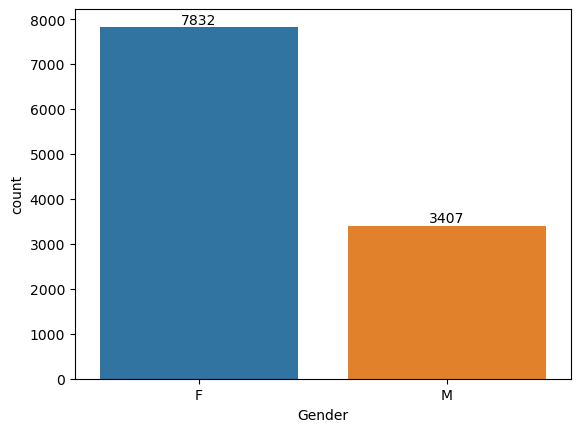

In [20]:
#Create a bar graph with seaborn
ax = sns.countplot(x ='Gender',data = diwali_sales_df)

#Labels on the bar
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

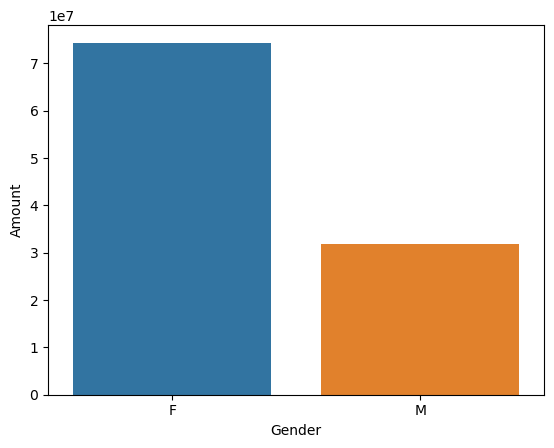

In [29]:
sales_gen =diwali_sales_df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values( by='Amount', ascending=False)

sns.barplot(x='Gender',y='Amount' ,data = sales_gen)

From the above grap we can see that most of the buyers are females and also the amount spend by females is more then mens.

Age

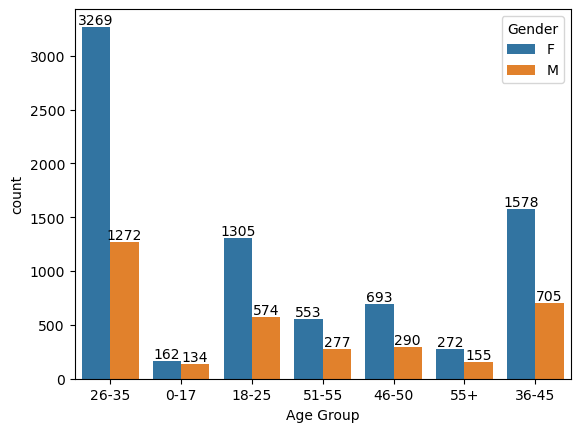

In [30]:
ax = sns.countplot(data = diwali_sales_df,x = 'Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

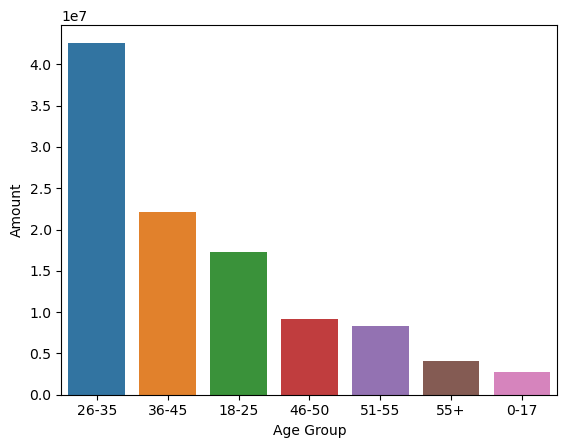

In [34]:
#Total Amount vs Age Group

sales_age = diwali_sales_df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Age Group',y ='Amount',data = sales_age)

From above graphs we can see that most of the buyers are females between the age group of 26-35 years

State

In [35]:
diwali_sales_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

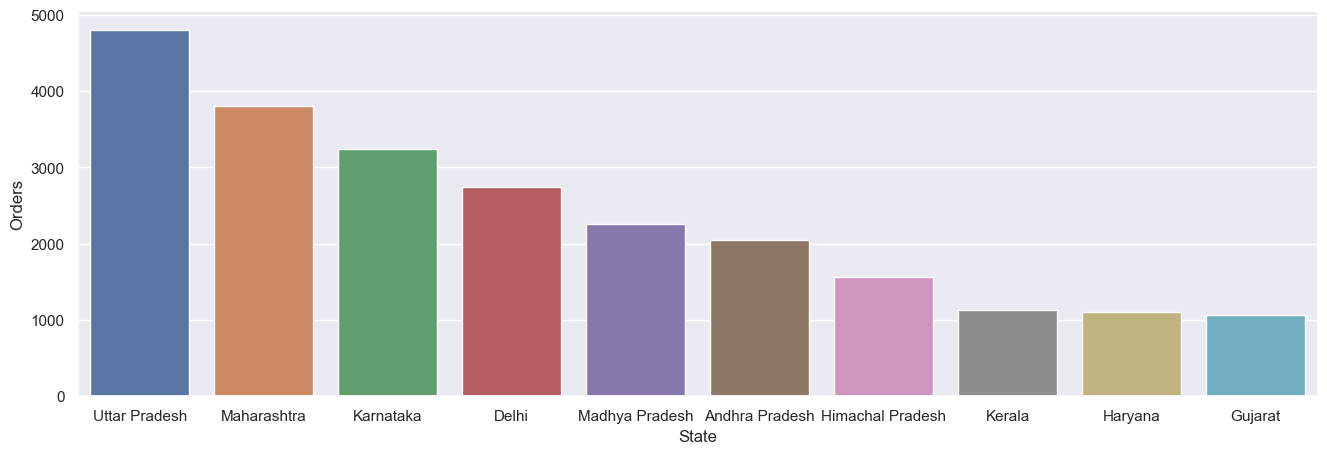

In [39]:
#total number of orders from top 10 states

sales_state = diwali_sales_df.groupby(['State'] ,as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending=False).head(10)

#Sets the size of the bars
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'State',data = sales_state,y ='Orders')

<Axes: xlabel='State', ylabel='Amount'>

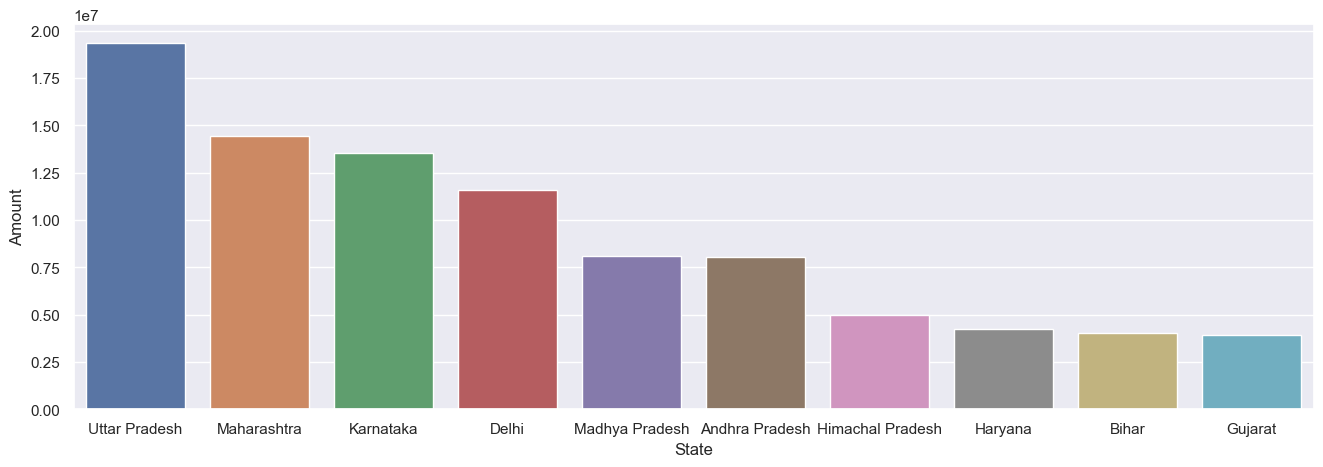

In [40]:
#total Amount/sales from top 10 states

sales_state = diwali_sales_df.groupby(['State'] ,as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False).head(10)

#Sets the size of the bars
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x = 'State',data = sales_state,y ='Amount')

Most of the orders and amount/sales are from Uttar Pradesh,Maharashta and Karnataka

Martial Status

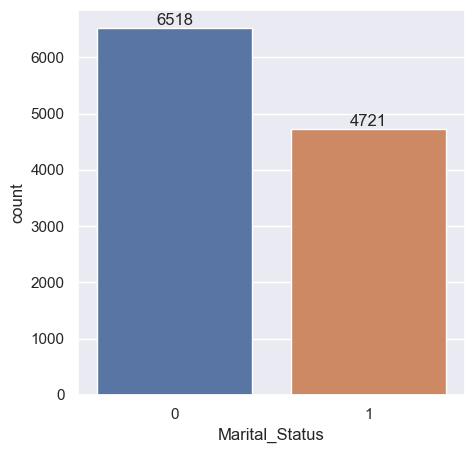

In [47]:
ax = sns.countplot(data = diwali_sales_df,x = 'Marital_Status')
sns.set(rc={'figure.figsize':(5,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

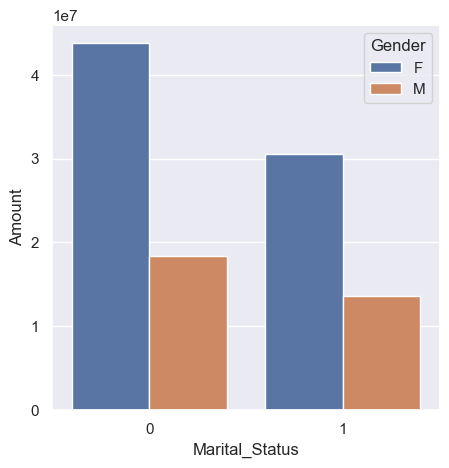

In [54]:
sales_m_status = diwali_sales_df.groupby(['Marital_Status','Gender'] ,as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

#Sets the size of the bars
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Marital_Status',data = sales_m_status,y ='Amount',hue='Gender')

Most of the buyers are married females

Occupation

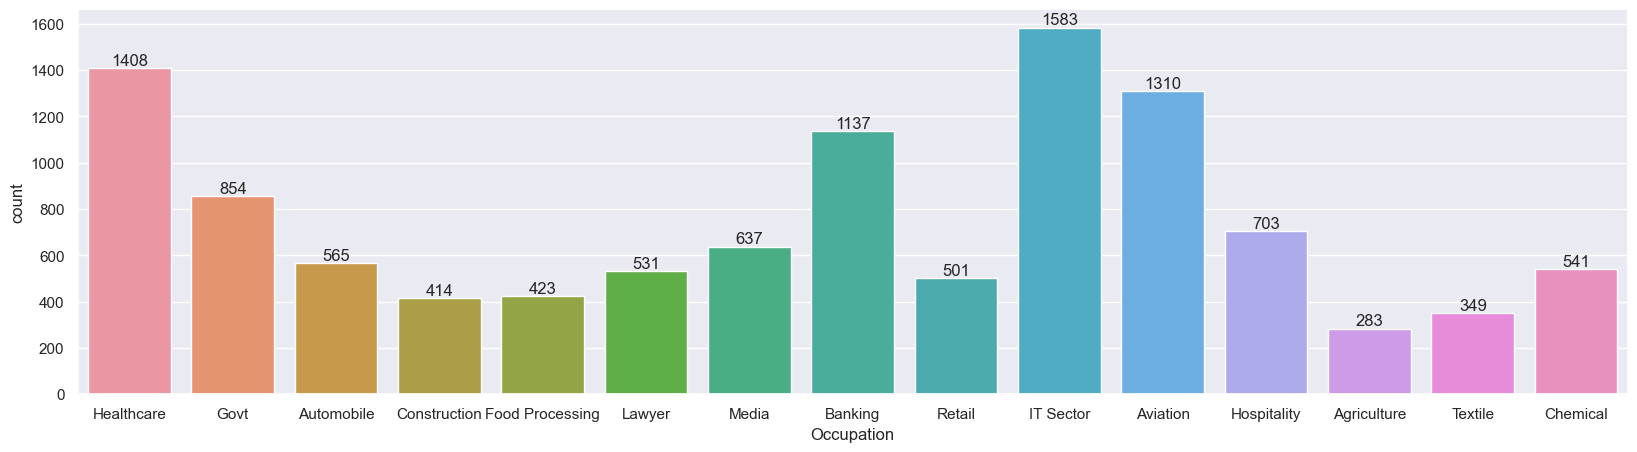

In [53]:
ax = sns.countplot(data = diwali_sales_df,x = 'Occupation')
sns.set(rc={'figure.figsize':(25,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

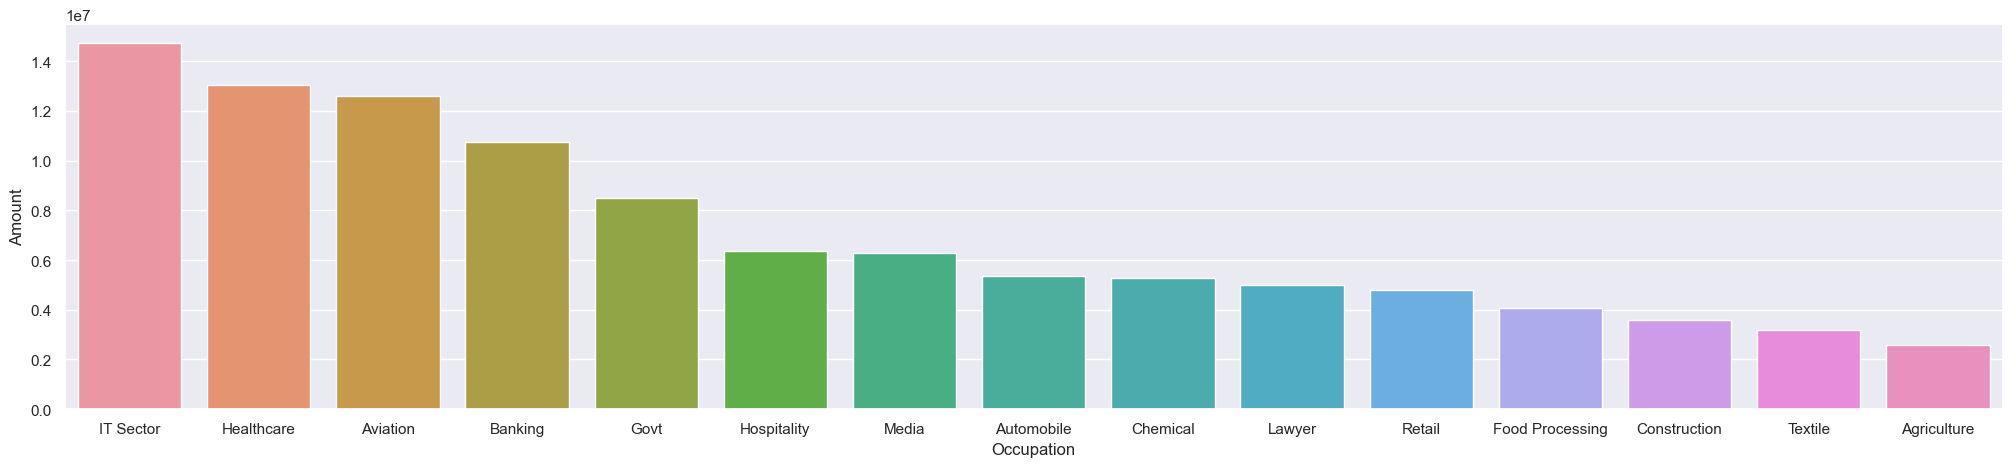

In [58]:
sales_occuption= diwali_sales_df.groupby(['Occupation'] ,as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

#Sets the size of the bars
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x = 'Occupation',data = sales_occuption,y ='Amount' )

Most of the buyers are from IT Sector,HealthCare and Avitation

Product Category

In [59]:
diwali_sales_df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

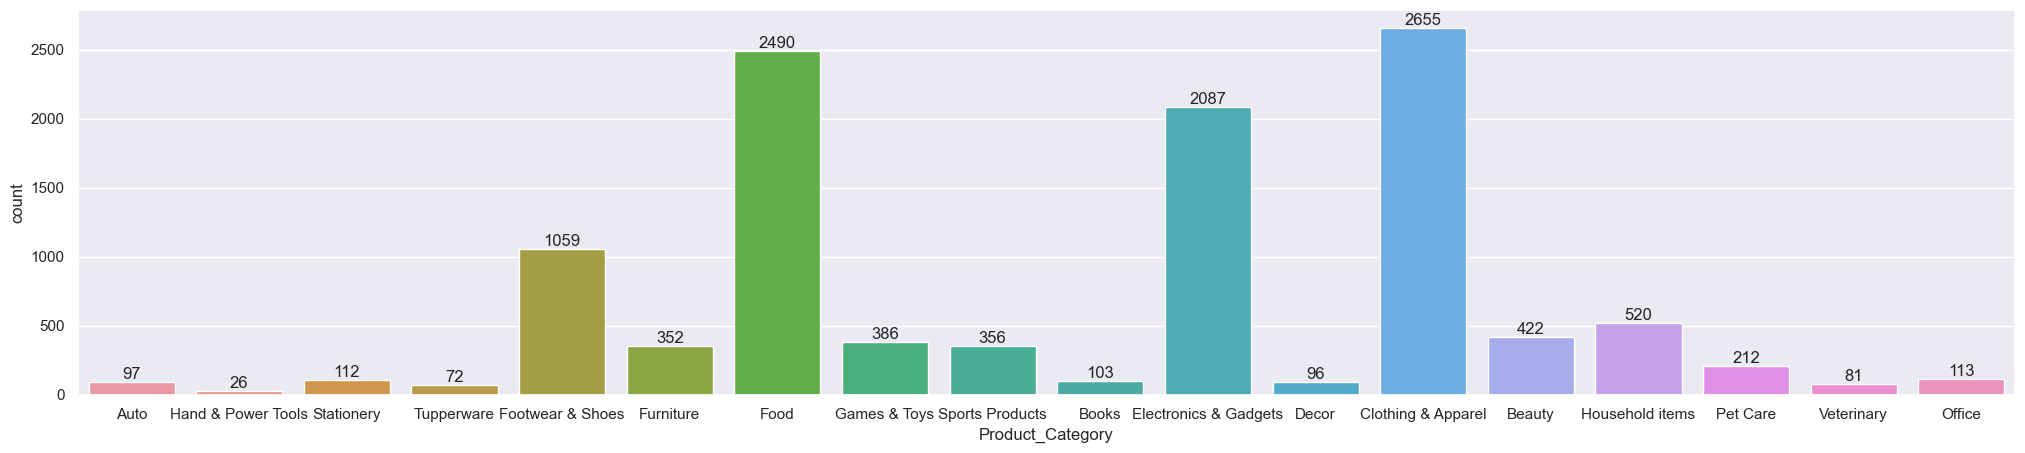

In [60]:
ax = sns.countplot(data = diwali_sales_df,x = 'Product_Category')
sns.set(rc={'figure.figsize':(25,5)})

for bars in ax.containers:
    ax.bar_label(bars)

Most of the purchased items are from Clothing & Apparel,Food and Electronics &Gadgets

<Axes: xlabel='Product_Category', ylabel='Amount'>

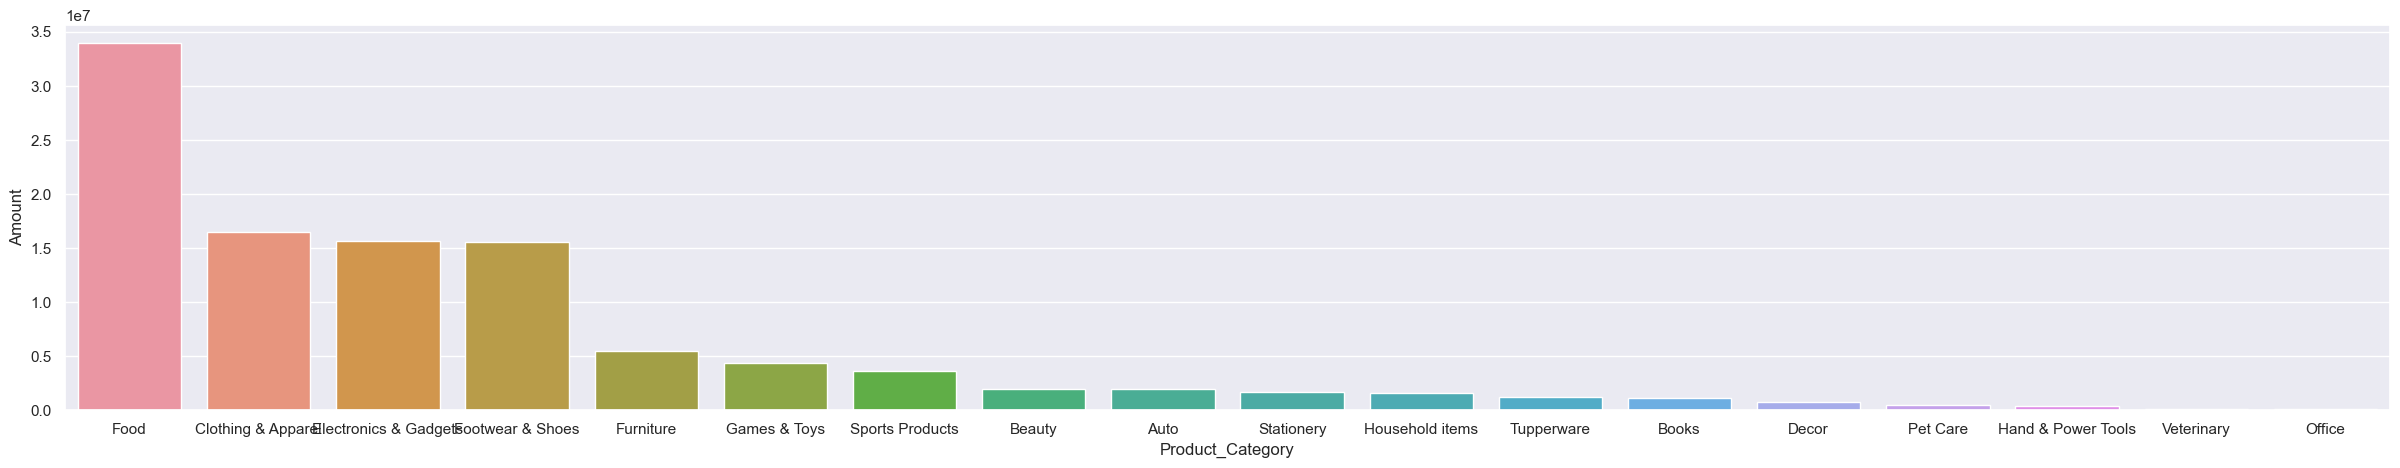

In [65]:
sales_cateogry= diwali_sales_df.groupby(['Product_Category'] ,as_index=False)['Amount'].sum().sort_values(by = 'Amount',ascending=False)

#Sets the size of the bars
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(x = 'Product_Category',data = sales_cateogry,y ='Amount' )

The most amount spent on fro purchases is from Food,Clothing & Apparel.

**Conclusion**

Married women with age group 26-35 years from Uttar Pradesh,Maharashtra and Karnataka working in IT,Healtcare and Aviation purchased the most items from Food,Clothing and Electronics